In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('d:\\testing\\bikes_rent.csv')

In [3]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


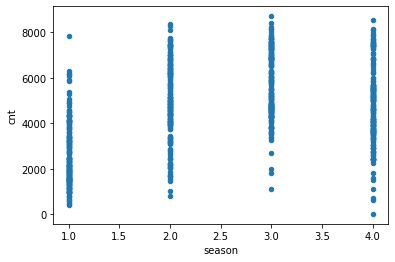

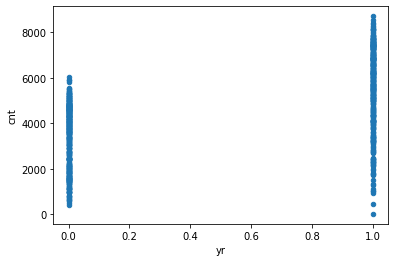

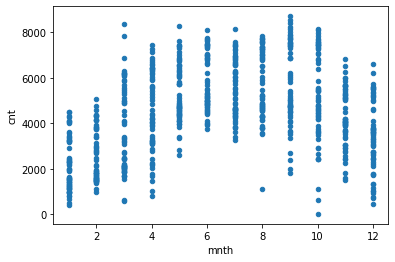

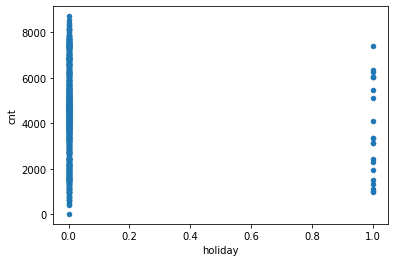

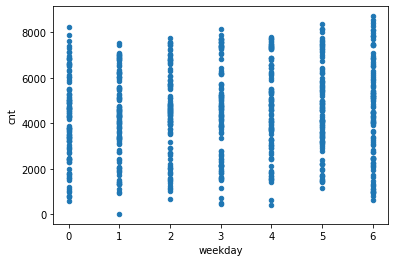

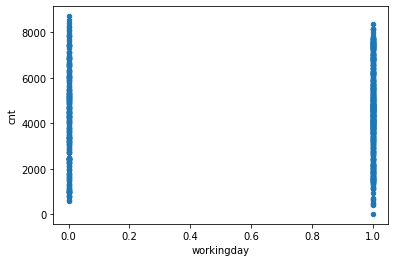

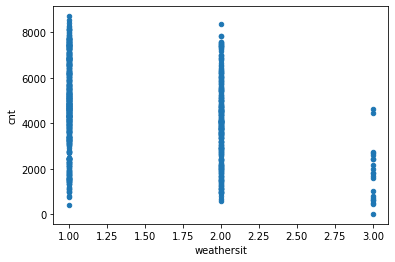

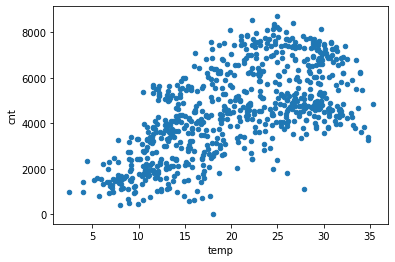

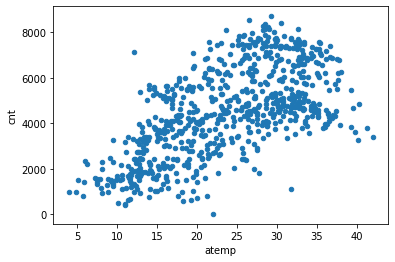

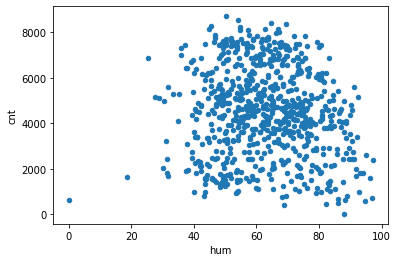

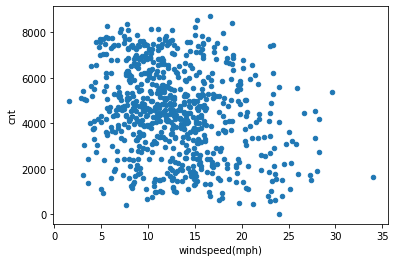

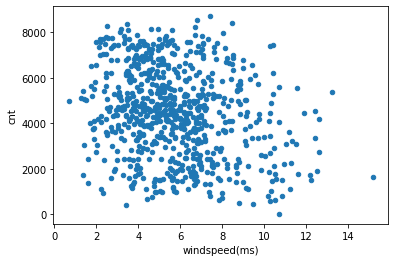

In [17]:
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, 'cnt', subplots=True, kind = 'scatter')

In [18]:
# Каков характер зависимости числа прокатов от месяца?
# ответ: с начала года до летних месяцев число прокатов растет,
# в летние месяцы примерно постоянно, затем падает

In [19]:
# Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
# ответ: скорее всего, линейная зависимость проявляется на графиках 
# "прокаты-температура" и "прокаты-погода по ощущениям"

In [26]:
# Код 1.1 (0.5 балла)
# Посчитайте корреляции всех признаков, кроме последнего, с последним с помощью метода corrwith:
cor = pd.DataFrame(df.drop('cnt', axis = 1).corrwith(df['cnt']))
cor.columns = ['корреляция']
print(cor)

                корреляция
season            0.406100
yr                0.566710
mnth              0.279977
holiday          -0.068348
weekday           0.067443
workingday        0.061156
weathersit       -0.297391
temp              0.627494
atemp             0.631066
hum              -0.100659
windspeed(mph)   -0.234545
windspeed(ms)    -0.234545


In [30]:
# Код 1.2 (0.5 балла)
# Посчитайте попарные корреляции между признаками temp, atemp, hum, windspeed(mph), windspeed(ms) и cnt
# с помощью метода corr:
df[['temp', 'atemp', 'hum', 'windspeed(mph)', 'windspeed(ms)']].corr()

,temp,atemp,hum,windspeed(mph),windspeed(ms)
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000


In [31]:
# Код 1.3 (0.5 балла)
# Выведите средние признаков
df.apply(np.mean)

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

In [32]:
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [33]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["cnt"]

In [34]:
from sklearn.linear_model import LinearRegression

In [42]:
# Код 2.1 (1 балл)
# Создайте объект линейного регрессора, обучите его на всех данных и выведите веса модели 
# (веса хранятся в переменной coef_ класса регрессора).
# Можно выводить пары (название признака, вес), воспользовавшись функцией zip, встроенной в язык python
# Названия признаков хранятся в переменной df.columns
regressor = LinearRegression()
regressor.fit(X, y)
zip(regressor.coef_, df.columns)
print(regressor.coef_)

[ 5.70867327e+02  1.02196023e+03 -1.41302321e+02 -8.67599317e+01
  1.37227081e+02  5.63914294e+01 -3.30234115e+02  3.67480386e+02
  5.85551472e+02 -1.45605328e+02  1.24551997e+13 -1.24551997e+13]


In [43]:
from sklearn.linear_model import Lasso, Ridge

In [45]:
# Код 2.2 (0.5 балла)
# Обучите линейную модель с L1-регуляризацией
lasso_regressor = Lasso()
lasso_regressor.fit(X, y)
zip(lasso_regressor.coef_, df.columns)
print(lasso_regressor.coef_)

[ 5.60241616e+02  1.01946349e+03 -1.28730627e+02 -8.61527813e+01
  1.37347894e+02  5.52123706e+01 -3.32369857e+02  3.76363236e+02
  5.76530794e+02 -1.44129155e+02 -1.97139689e+02 -2.80392089e-08]


In [50]:
# Код 2.3 (0.5 балла)
# Обучите линейную модель с L2-регуляризацией
ridge_regressor = Ridge()
ridge_regressor.fit(X, y)
zip(ridge_regressor.coef_, df.columns)
print(ridge_regressor.coef_)

[ 563.06457225 1018.94837879 -131.87332028  -86.746098    138.00511118
   55.90311038 -332.3497885   386.45788919  566.34704706 -145.0713273
  -99.25944108  -99.25944115]


In [51]:
# Поясните, каким образом введение регуляризации решает проблему с весами и мультиколлинеарностью.
# Ваш ответ (1 балл): при регуляризации мы решаем задачу условной оптимизации,
# в которой минимизируем ошибку, ограничивая нормы весов сверху. Поэтому веса уменьшаются.

In [53]:
# Код 3.1 (1 балл)
alphas = np.arange(1, 500, 50)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))
# Для каждого значения коэффициента из alphas обучите регрессор Lasso
# и запишите веса в соответствующую строку матрицы coefs_lasso (вспомните встроенную в python функцию enumerate),
# а затем обучите Ridge и запишите веса в coefs_ridge.

count = 0
for alpha in alphas:
    regressor_lasso = Lasso(alpha = alpha)
    regressor_lasso.fit(X, y)
    coefs_lasso[count, :] = regressor_lasso.coef_
    
    regressor_ridge = Ridge(alpha = alpha)
    regressor_ridge.fit(X, y)
    coefs_ridge[count, :] = regressor_ridge.coef_
    
    count += 1

Text(0.5, 1.0, 'Ridge')

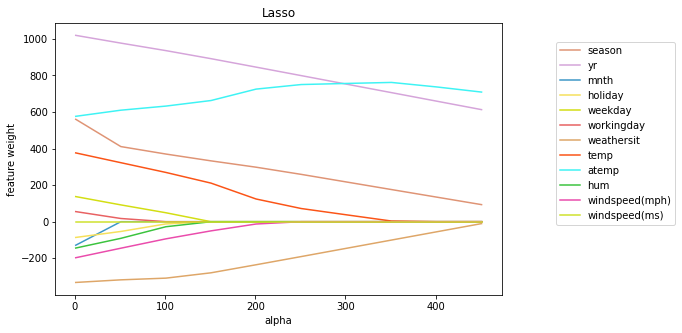

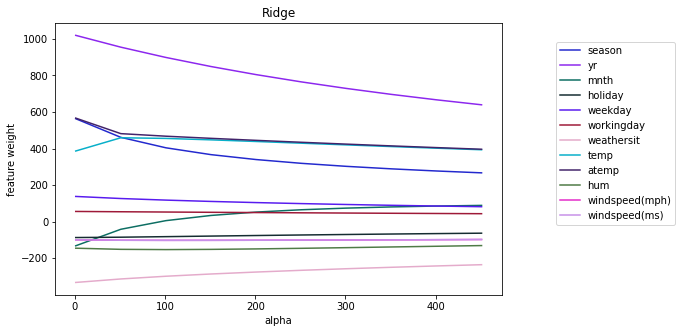

In [54]:
plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(8, 5))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

In [55]:
# Какой регуляризатор (Ridge или Lasso) агрессивнее уменьшает веса при одном и том же alpha?
# Ответ: Lasso

In [56]:
# Что произойдет с весами Lasso, если alpha сделать очень большим? Поясните, почему так происходит.
# Ответ: оптимальные веса будут стремиться к нулю. В задаче оптимизации при больших
# значениях альфа член alpha*w_i будет значительно больше исходной ошибки,
# следовательно оптимальным решением будет сильно уменьшить сами веса.

In [57]:
# Можно ли утверждать, что Lasso исключает один из признаков windspeed при любом значении alpha > 0? 
# А Ridge? Ситается, что регуляризатор исключает признак, если коэффициент при нем < 1e-3.
# Ответ: Да. в случае Ridge - нет.

In [58]:
# Какой из регуляризаторов подойдет для отбора неинформативных признаков?
# Ответ:Lasso

In [59]:
from sklearn.linear_model import LassoCV

alpha =  6


,weight
feature,
season,5.320190e+02
yr,1.015060e+03
mnth,-1.000395e+02
holiday,-8.329396e+01
weekday,1.325045e+02
workingday,5.155709e+01
weathersit,-3.305599e+02
temp,3.706799e+02
atemp,5.813969e+02


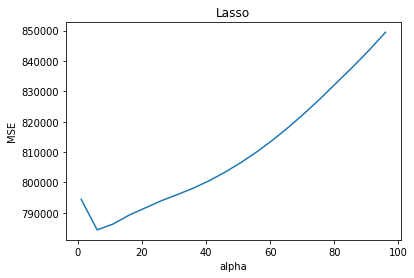

In [68]:
# Код 3.2 (1 балл)
# Обучите регрессор LassoCV на всех параметрах регуляризации из alpha
# Постройте график _усредненного_ по строкам MSE в зависимости от alpha. 
# Выведите выбранное alpha, а также пары "признак-коэффициент" для обученного вектора коэффициентов
alphas = np.arange(1, 100, 5)
lassocv_regressor = LassoCV(alphas = alphas)
lassocv_regressor.fit(X, y)
mean_mse = np.mean(lassocv_regressor.mse_path_, axis = 1)
plt.plot(lassocv_regressor.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')

print('alpha = ', lassocv_regressor.alpha_)
fin_coefs = pd.DataFrame(zip(lassocv_regressor.coef_, df.columns))
fin_coefs.columns = ['weight', 'feature']
fin_coefs.set_index('feature')

[6 1 6 1 1]


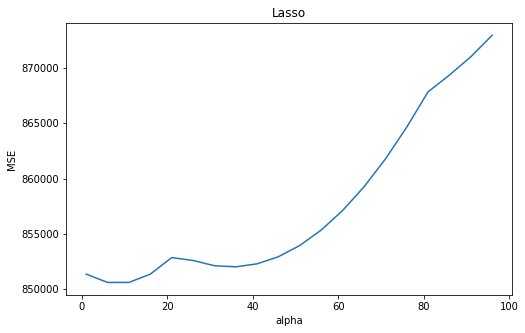

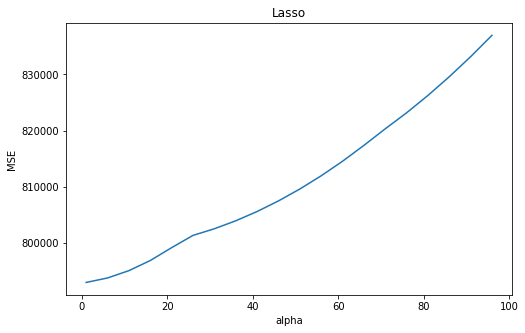

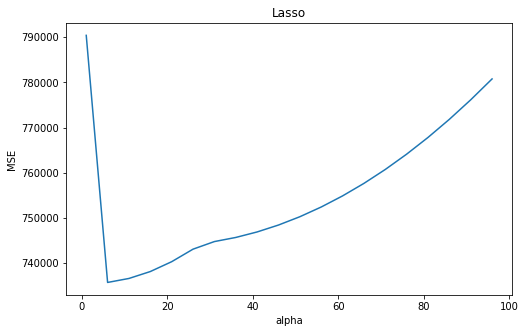

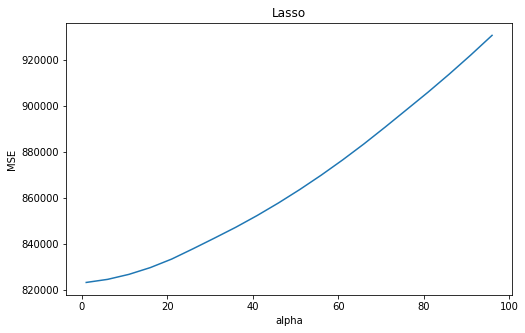

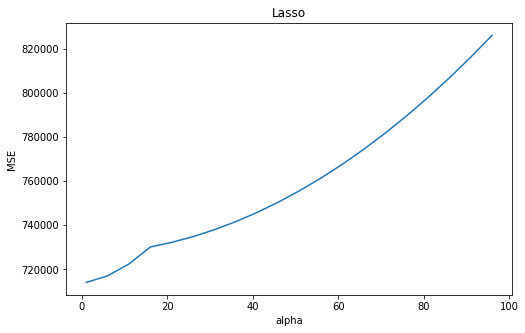

In [65]:
# Код 3.3 (1 балл)
# Выведите значения alpha, соответствующие минимумам MSE на каждом разбиении (то есть по столбцам).
# На трех отдельных графиках визуализируйте столбцы .mse_path_
print(lassocv_regressor.alphas_[np.argmin(lassocv_regressor.mse_path_, axis = 0)])


for i in range(lassocv_regressor.mse_path_.shape[1]):
    plt.figure(figsize=(8, 5))
    plt.plot(lassocv_regressor.alphas_, lassocv_regressor.mse_path_[:, i])
    plt.xlabel('alpha')
    plt.ylabel('MSE')
    plt.title('Lasso')
    plt.show()

In [66]:
# В последней обученной модели выберите 4 признака с наибольшими (положительными) коэфициентами (и выпишите их), 
# посмотрите на визуализации зависимостей cnt от этих признаков, которые мы рисовали в блоке "Знакомство с данными". 
# Видна ли возрастающая линейная зависимость cnt от этих признаков по графикам? 
# Логично ли утверждать (из здравого смысла), что чем больше значение этих признаков, 
# тем больше людей захотят взять велосипеды?
# Ответ: год, сезонность, и температура (температура по ощущению тоже). Это вполне логично, 
# за исключением года, тут, похоже, просто данность.

In [67]:
# Выберите 3 признака с наибольшими по модулю отрицательными коэффициентами (и выпишите их), 
# посмотрите на соответствующие визуализации. Видна ли убывающая линейная зависимость? 
# Логично ли утверждать, что чем больше величина этих признаков, тем меньше людей захотят взять велосипеды?
# Ответ:градация погодных условий, ветер и влажность. Все это вполне логично.

In [ ]:
# Выпишите признаки с коэффициентами, близкими к нулю (< 1e-3). Как вы думаете, 
# почему модель исключила их из модели (вновь посмотрите на графики)? 
# Верно ли, что они никак не влияют на спрос на велосипеды?
# Ответ: два признака - скорость ветра в mph и ms - по сути, одно и тоже,
# поэтому логично, что модель выкинула один из них, как вторичный.